In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

import keras
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint

2023-05-19 03:50:07.261540: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-19 03:50:07.261593: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Import the data

In [2]:
import pandas as pd
from sklearn.utils import shuffle

# Read the CSV file into a pandas DataFrame
data = pd.read_csv("rumus + data skripsi angka polos jarak dan visibilitas 2.csv")

# Shuffle the data
shuffled_data = shuffle(data, random_state=42)

# Calculate the split index based on the desired 50:50 ratio
split_index = int(len(shuffled_data) * 0.5)

# Split the data into two halves
data_1 = shuffled_data[:split_index]
data_2 = shuffled_data[split_index:]

# Verify the lengths of the split data
print(f"Data 1 length: {len(data_1)}")
print(f"Data 2 length: {len(data_2)}")


Data 1 length: 51
Data 2 length: 52


In [3]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split



# Shuffle the data
shuffled_data = shuffle(data, random_state=42)

# Get unique classes from the "Peruntukan" column
classes = shuffled_data['Peruntukan'].unique()

# Initialize empty dataframes for train and test data
train_data = pd.DataFrame()
test_data = pd.DataFrame()

# Iterate over each class
for cls in classes:
    cls_data = shuffled_data[shuffled_data['Peruntukan'] == cls]
    
    # Split the class data into train and test
    cls_train, cls_test = train_test_split(cls_data, test_size=0.5, random_state=42)
    
    # Append the train and test data to the respective dataframes
    train_data = train_data.append(cls_train)
    test_data = test_data.append(cls_test)

# Verify the lengths of the split data
print(f"Train data length: {len(train_data)}")
print(f"Test data length: {len(test_data)}")


/tmp/ipykernel_211530/3088311326.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_data = train_data.append(cls_train)
/tmp/ipykernel_211530/3088311326.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_data = test_data.append(cls_test)
/tmp/ipykernel_211530/3088311326.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_data = train_data.append(cls_train)
/tmp/ipykernel_211530/3088311326.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_data = test_data.append(cls_test)
/tmp/ipykernel_211530/3088311326.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future v

Train data length: 49
Test data length: 54


/tmp/ipykernel_211530/3088311326.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_data = test_data.append(cls_test)
/tmp/ipykernel_211530/3088311326.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_data = train_data.append(cls_train)
/tmp/ipykernel_211530/3088311326.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_data = test_data.append(cls_test)
/tmp/ipykernel_211530/3088311326.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_data = train_data.append(cls_train)
/tmp/ipykernel_211530/3088311326.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future v

In [4]:
train_data

,No,Nama Aset,Bentuk Pemanfaatan,Peruntukan,Pusat_kota,Visibilitas,Bangunan,Luas,Desa,Kecamatan,...,Luas.1,Bujur,Lintang,Sumber_data,Bujur Desimal,Lintang Desimal,Bujur pahlawan,Lintang pahlawan,Jarak pusat kota,Jarak pusat kota2
79,9.0,NaN,Sewa,Ruko,Pusat,Strategis,Bagus,200,NaN,NaN,...,200.0,111.512291,-7.633486,Sewa - Kabupaten,111.512291,7.633486,111.520149,7.624574,698,1316.067805
84,38.0,NaN,Sewa,Ruko,Pusat,Strategis,Bagus,100,NaN,NaN,...,100.0,111.658034,-7.548136,Sewa - Kabupaten,111.658034,7.548136,111.520149,7.624574,17982,17413.148672
82,31.0,NaN,Sewa,Ruko,Pusat,Strategis,Bagus,255,PANDEAN,TAMAN,...,255.0,31942.000000,38652.000000,Pakai PasarKota,111.532367,7.644200,111.520149,7.624574,2402,2564.280860
40,43.0,NaN,Pakai,Ruko,Pusat,Sedang,Sedang,14610,ORO ORO OMBO,KARTOHARJO,...,14610.0,32042.000000,37347.000000,NaN,111.534033,7.622450,111.520149,7.624574,2037,1548.339050
59,51.0,NaN,Pakai,Ruko,Pusat,Sedang,Sedang,3580,PILANGBANGO,KARTOHARJO,...,3580.0,32496.000000,37316.000000,NaN,111.541600,7.621933,111.520149,7.624574,2847,2382.323660
80,10.0,NaN,Sewa,Ruko,Pusat,Strategis,Bagus,90,NaN,NaN,...,90.0,NaN,NaN,Sewa - Kota,111.000000,7.000000,111.520149,7.624574,90232,90078.934395
90,55.0,NaN,Pakai,Ruko,Pusat,Sedang,Sedang,8740,REJOMULYO,KARTOHARJO,...,8740.0,32566.000000,37368.000000,NaN,111.542767,7.622800,111.520149,7.624574,2946,2500.530108
94,83.0,NaN,Sewa,Ruko,Pusat,Strategis,Bagus,366,ORO ORO OMBO,KARTOHARJO,...,366.0,32009.000000,37435.000000,NaN,111.533483,7.623917,111.520149,7.624574,1926,1471.417607
60,53.0,NaN,Pakai,Ruko,Pusat,Sedang,Sedang,5150,REJOMULYO,KARTOHARJO,...,5150.0,32429.000000,37338.000000,NaN,111.540483,7.622300,111.520149,7.624574,2717,2255.307555
0,35.0,NaN,Sewa,Ruko,Pusat,Strategis,Bagus,3720,MANGUHARJO,MANGUHARJO,...,3720.0,30411.000000,37989.000000,Pakai PasarKota,111.506850,7.633150,111.520149,7.624574,1186,1748.604165


In [5]:
test_data

,No,Nama Aset,Bentuk Pemanfaatan,Peruntukan,Pusat_kota,Visibilitas,Bangunan,Luas,Desa,Kecamatan,...,Luas.1,Bujur,Lintang,Sumber_data,Bujur Desimal,Lintang Desimal,Bujur pahlawan,Lintang pahlawan,Jarak pusat kota,Jarak pusat kota2
46,34.0,NaN,Sewa,Ruko,Pusat,Strategis,Bagus,865,PANDEAN,TAMAN,...,865.0,31114.000000,38391.000000,Pakai PasarKota,111.518567,7.639850,111.520149,7.624574,1213,1707.540630
64,6.0,NaN,Pakai,Ruko,Pusat,Strategis,Sedang,2235,KARTOHARJO,KARTOHARJO,...,2235.0,31336.000000,37666.000000,Sewa - Kota,111.522267,7.627767,111.520149,7.624574,620,424.855256
22,80.0,NaN,Sewa,Ruko,Pusat,Strategis,Bagus,270,MADIUN LOR,MANGUHARJO,...,270.0,31302.000000,36899.000000,NaN,111.521700,7.614983,111.520149,7.624574,1658,1080.045845
70,81.0,NaN,Sewa,Ruko,Pusat,Strategis,Bagus,2379,NAMBANGAN KIDUL,MANGUHARJO,...,2379.0,31053.000000,38709.000000,NaN,111.517550,7.645150,111.520149,7.624574,1788,2305.804817
85,39.0,NaN,Sewa,Ruko,Pusat,Strategis,Bagus,2000,NaN,NaN,...,2000.0,111.515217,-7.624166,Sewa - Kabupaten,111.515217,7.624166,111.520149,7.624574,574,545.454479
86,40.0,NaN,Sewa,Ruko,Pusat,Strategis,Bagus,70,NaN,NaN,...,70.0,111.661205,-7.548428,Sewa - Kabupaten,111.661205,7.548428,111.520149,7.624574,18269,17703.461987
24,78.0,NaN,Sewa,Ruko,Pusat,Strategis,Bagus,754,ORO ORO OMBO,KARTOHARJO,...,754.0,31782.000000,37408.000000,NaN,111.529700,7.623467,111.520149,7.624574,1553,1059.810560
57,50.0,NaN,Pakai,Ruko,Pusat,Sedang,Sedang,380,ORO ORO OMBO,KARTOHARJO,...,380.0,32117.000000,37327.000000,NaN,111.535283,7.622117,111.520149,7.624574,2179,1690.218450
75,NaN,NaN,Pakai,Ruko,Pusat,Sedang,Sedang,175,MADIUN LOR,MANGUHARJO,...,175.0,31286.000000,37237.000000,NaN,111.521433,7.620617,111.520149,7.624574,1071,462.241288
26,30.0,NaN,Sewa,Ruko,Pusat,Strategis,Bagus,87580,KLEGEN,KARTOHARJO,...,87580.0,32516.000000,38002.000000,NaN,111.541933,7.633367,111.520149,7.624574,2811,2592.305034


In [6]:
training = train_data
test = test_data

training = training[["Peruntukan","Pusat_kota","Visibilitas","Bangunan","Luas"]]
test = test[["Peruntukan","Pusat_kota","Visibilitas","Bangunan","Luas"]]

# Data visualisasi

# Change categorical to number 

In [7]:
condition = [  training.Pusat_kota == "Pusat",
             training.Pusat_kota == "Sedang",
              training.Pusat_kota == "Pinggir",
]

value = [3,2,1]

training.Pusat_kota = np.select(condition,value)
####
####

condition = [  training.Visibilitas == "Strategis",
             training.Visibilitas == "Sedang",
              training.Visibilitas == "Kurang",
]

value = [3,2,1]

training.Visibilitas = np.select(condition,value)
#####
#####

condition = [  training.Bangunan == "Bagus",
             training.Bangunan == "Sedang",
             
]

value = [2,1]

training.Bangunan = np.select(condition,value,0)


condition = [ 
            training.Peruntukan == "Pasar",
             training.Peruntukan == "Kantor",
             training.Peruntukan == "Ruko",
             training.Peruntukan == "Taman",
             training.Peruntukan == "Perumahan",
             training.Peruntukan == "Sawah",
             
]

value = [5,4,3,2,1,0]

training.Peruntukan = np.select(condition,value,0)

/tmp/ipykernel_211530/3571141091.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training.Pusat_kota = np.select(condition,value)
/tmp/ipykernel_211530/3571141091.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training.Visibilitas = np.select(condition,value)
/tmp/ipykernel_211530/3571141091.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [8]:
condition = [  test.Pusat_kota == "Pusat",
             test.Pusat_kota == "Sedang",
              test.Pusat_kota == "Pinggir",
]

value = [3,2,1]

test.Pusat_kota = np.select(condition,value)
####
####

condition = [  test.Visibilitas == "Strategis",
             test.Visibilitas == "Sedang",
              test.Visibilitas == "Kurang",
]

value = [3,2,1]

test.Visibilitas = np.select(condition,value)
#####
#####

condition = [  test.Bangunan == "Bagus",
             test.Bangunan == "Sedang",
             
]

value = [2,1]

test.Bangunan = np.select(condition,value,0)


condition = [ 
            test.Peruntukan == "Pasar",
             test.Peruntukan == "Kantor",
             test.Peruntukan == "Ruko",
             test.Peruntukan == "Taman",
             test.Peruntukan == "Perumahan",
             test.Peruntukan == "Sawah",
             
]

value = [5,4,3,2,1,0]

test.Peruntukan = np.select(condition,value,0)

/tmp/ipykernel_211530/3734195063.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.Pusat_kota = np.select(condition,value)
/tmp/ipykernel_211530/3734195063.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.Visibilitas = np.select(condition,value)
/tmp/ipykernel_211530/3734195063.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [9]:
training

,Peruntukan,Pusat_kota,Visibilitas,Bangunan,Luas
79,3,3,3,2,200
84,3,3,3,2,100
82,3,3,3,2,255
40,3,3,2,1,14610
59,3,3,2,1,3580
80,3,3,3,2,90
90,3,3,2,1,8740
94,3,3,3,2,366
60,3,3,2,1,5150
0,3,3,3,2,3720


In [10]:
test

,Peruntukan,Pusat_kota,Visibilitas,Bangunan,Luas
46,3,3,3,2,865
64,3,3,3,1,2235
22,3,3,3,2,270
70,3,3,3,2,2379
85,3,3,3,2,2000
86,3,3,3,2,70
24,3,3,3,2,754
57,3,3,2,1,380
75,3,3,2,1,175
26,3,3,3,2,87580


# Dataframe to Dataset

In [11]:
def df_to_dataset(dataframe, shuffle=False, batch_size=4):
  dataframe = dataframe.copy()
  labels = dataframe.pop('Peruntukan')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [12]:
train_ds = df_to_dataset(training)
val_ds = df_to_dataset(test)

2023-05-19 03:50:16.831186: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-19 03:50:16.831231: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-19 03:50:16.831261: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (gusanwa): /proc/driver/nvidia/version does not exist
2023-05-19 03:50:16.831616: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Feature Normalizer

In [13]:
def get_normalization_layer(name, dataset):
  # Create a Normalization layer for the feature.
  normalizer = layers.Normalization(axis=None)

  # Prepare a Dataset that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the statistics of the data.
  normalizer.adapt(feature_ds)

  return normalizer

In [14]:
all_inputs = []
encoded_features = []

# Numerical features.
for header in ["Pusat_kota","Visibilitas","Bangunan","Luas"]:
  numeric_col = tf.keras.Input(shape=(1,), name=header)
  normalization_layer = get_normalization_layer(header, train_ds)
  encoded_numeric_col = normalization_layer(numeric_col)
  all_inputs.append(numeric_col)
  encoded_features.append(encoded_numeric_col)

In [15]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])


In [16]:
checkpoint_callback = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, mode='max')

# Model build

In [17]:
all_features = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(32, activation="relu")(all_features)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(6)(x)

model = tf.keras.Model(all_inputs, output)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics="accuracy",
             )

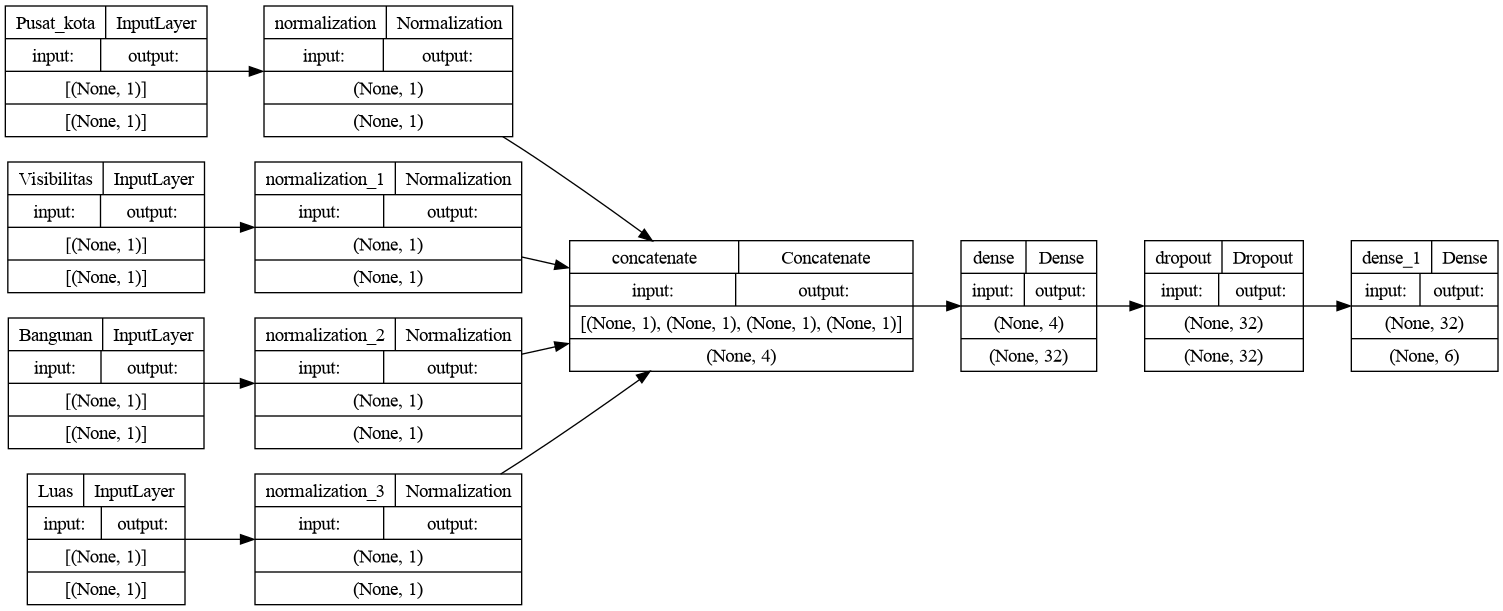

In [18]:
# Use `rankdir='LR'` to make the graph horizontal.
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

# Model Evaluation

Epoch 1/150
13/13 [==============================] - 1s 29ms/step - loss: 0.4978 - accuracy: 0.8367 - val_loss: 0.4625 - val_accuracy: 0.8333
Epoch 2/150
13/13 [==============================] - 0s 6ms/step - loss: 0.5631 - accuracy: 0.7959 - val_loss: 0.4562 - val_accuracy: 0.8333
Epoch 3/150
13/13 [==============================] - 0s 6ms/step - loss: 0.5949 - accuracy: 0.7959 - val_loss: 0.4509 - val_accuracy: 0.8333
Epoch 4/150
13/13 [==============================] - 0s 6ms/step - loss: 0.5188 - accuracy: 0.8163 - val_loss: 0.4460 - val_accuracy: 0.8333
Epoch 5/150
13/13 [==============================] - 0s 6ms/step - loss: 0.4478 - accuracy: 0.8776 - val_loss: 0.4428 - val_accuracy: 0.8333
Epoch 6/150
13/13 [==============================] - 0s 6ms/step - loss: 0.5664 - accuracy: 0.7959 - val_loss: 0.4387 - val_accuracy: 0.8333
Epoch 7/150
13/13 [==============================] - 0s 6ms/step - loss: 0.5345 - accuracy: 0.7959 - val_loss: 0.4337 - val_accuracy: 0.8148
Epoch 8/150


Epoch 59/150
13/13 [==============================] - 0s 5ms/step - loss: 0.4937 - accuracy: 0.8571 - val_loss: 0.3286 - val_accuracy: 0.8889
Epoch 60/150
13/13 [==============================] - 0s 5ms/step - loss: 0.3988 - accuracy: 0.8367 - val_loss: 0.3279 - val_accuracy: 0.8889
Epoch 61/150
13/13 [==============================] - 0s 5ms/step - loss: 0.3871 - accuracy: 0.8163 - val_loss: 0.3269 - val_accuracy: 0.8889
Epoch 62/150
13/13 [==============================] - 0s 5ms/step - loss: 0.4018 - accuracy: 0.8163 - val_loss: 0.3255 - val_accuracy: 0.8889
Epoch 63/150
13/13 [==============================] - 0s 5ms/step - loss: 0.3651 - accuracy: 0.8776 - val_loss: 0.3247 - val_accuracy: 0.8889
Epoch 64/150
13/13 [==============================] - 0s 5ms/step - loss: 0.3970 - accuracy: 0.8571 - val_loss: 0.3239 - val_accuracy: 0.8889
Epoch 65/150
13/13 [==============================] - 0s 5ms/step - loss: 0.4819 - accuracy: 0.8163 - val_loss: 0.3228 - val_accuracy: 0.8889
Epoch 

13/13 [==============================] - 0s 5ms/step - loss: 0.4130 - accuracy: 0.7755 - val_loss: 0.3091 - val_accuracy: 0.9074
Epoch 117/150
13/13 [==============================] - 0s 5ms/step - loss: 0.3595 - accuracy: 0.8571 - val_loss: 0.3074 - val_accuracy: 0.9074
Epoch 118/150
13/13 [==============================] - 0s 5ms/step - loss: 0.3823 - accuracy: 0.8367 - val_loss: 0.3061 - val_accuracy: 0.9074
Epoch 119/150
13/13 [==============================] - 0s 5ms/step - loss: 0.3448 - accuracy: 0.8571 - val_loss: 0.3060 - val_accuracy: 0.9074
Epoch 120/150
13/13 [==============================] - 0s 6ms/step - loss: 0.3235 - accuracy: 0.8776 - val_loss: 0.3066 - val_accuracy: 0.9074
Epoch 121/150
13/13 [==============================] - 0s 5ms/step - loss: 0.3457 - accuracy: 0.8571 - val_loss: 0.3057 - val_accuracy: 0.9074
Epoch 122/150
13/13 [==============================] - 0s 5ms/step - loss: 0.2948 - accuracy: 0.8776 - val_loss: 0.3044 - val_accuracy: 0.9074
Epoch 123/150

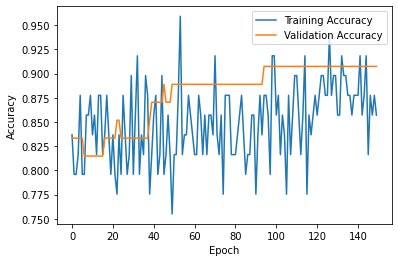

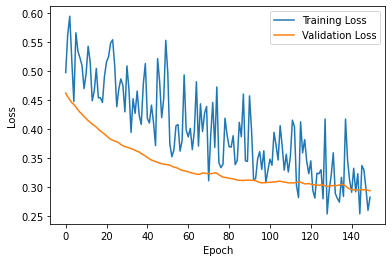

In [34]:
import matplotlib.pyplot as plt


history = model.fit(train_ds, epochs=150, validation_data=val_ds, callbacks=[checkpoint_callback])

# Get the training and validation metrics from the history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [35]:
max_test_accuracy_index = history.history['val_accuracy'].index(max(history.history['val_accuracy']))

# Get the corresponding training accuracy
training_accuracy = history.history['accuracy'][max_test_accuracy_index]

print('Best validation accuracy:', max(history.history['val_accuracy']))
print('Training accuracy at the best test accuracy:', training_accuracy)

Best validation accuracy: 0.9074074029922485
Training accuracy at the best test accuracy: 0.8775510191917419


# Confusion Matriks

In [36]:
from sklearn.metrics import confusion_matrix
best_model = tf.keras.models.load_model('./best_model.h5')
model = best_model

y_pred = model.predict(val_ds)

# Ubah output prediksi menjadi label kelas
label_kelas = ['Sawah', 'Perumahan', 'Taman', 'Ruko', 'Kantor', 'Pasar']
y_pred_label = [label_kelas[np.argmax(prediksi)] for prediksi in y_pred]

#test label
test_labels = test_data.Peruntukan

# Calculate the confusion matrix
cm = confusion_matrix(test_labels, y_pred_label)

print('Best validation accuracy:', max(history.history['val_accuracy']))
print('Training accuracy at the best test accuracy:', training_accuracy)
print('Confusion matrix:')
print(cm)


Best validation accuracy: 0.9074074029922485
Training accuracy at the best test accuracy: 0.8775510191917419
Confusion matrix:
[[ 6  0  0  0  0  0]
 [ 0  4  0  4  0  0]
 [ 0  0  4  0  0  0]
 [ 0  1  0 20  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0  3]]


In [37]:
confusion_matrix = cm

true_positives = np.diagonal(confusion_matrix)

# Step 3: Calculate the accuracy percentage for each class
class_totals = np.sum(confusion_matrix, axis=1)
class_accuracies = true_positives / class_totals * 100

# Step 4: Calculate the overall accuracy percentage
total_instances = np.sum(confusion_matrix)
overall_accuracy = np.sum(true_positives) / total_instances * 100

# Step 5: Calculate the total data instances for each class
class_data_totals = np.sum(confusion_matrix, axis=0)

# Print the results
print("True Positives for each class:", true_positives)
print("Total Data Instances for each class:", class_data_totals)
print("Overall Accuracy Percentage:", overall_accuracy)

True Positives for each class: [ 6  4  4 20 12  3]
Total Data Instances for each class: [ 6  5  4 24 12  3]
Overall Accuracy Percentage: 90.74074074074075


In [38]:
true_positives = np.diagonal(confusion_matrix)

# Step 3: Calculate the accuracy percentage for each class
class_data_totals = np.sum(confusion_matrix, axis=0)
class_accuracies = true_positives / class_data_totals * 100

# Step 4: Calculate the overall accuracy percentage
total_instances = np.sum(confusion_matrix)
overall_accuracy = np.sum(true_positives) / total_instances * 100

# Print the results
print("Accuracy for each label:", class_accuracies)
print("True Positives for each class:", true_positives)
print("Total Data Instances for each class:", class_data_totals)
print("Overall Accuracy Percentage:", overall_accuracy)

Accuracy for each label: [100.          80.         100.          83.33333333 100.
 100.        ]
True Positives for each class: [ 6  4  4 20 12  3]
Total Data Instances for each class: [ 6  5  4 24 12  3]
Overall Accuracy Percentage: 90.74074074074075


In [39]:
for label, accuracy in zip(label_kelas, class_accuracies):
    print("Accuracy for", label, ":", accuracy)
    

Accuracy for Sawah : 100.0
Accuracy for Perumahan : 80.0
Accuracy for Taman : 100.0
Accuracy for Ruko : 83.33333333333334
Accuracy for Kantor : 100.0
Accuracy for Pasar : 100.0


In [40]:
true_positives = np.diagonal(confusion_matrix)
false_positives = np.sum(confusion_matrix, axis=0) - true_positives
false_negatives = np.sum(confusion_matrix, axis=1) - true_positives

# Step 3: Calculate precision, recall, and F1 score for each label
accuracy = true_positives / np.sum(confusion_matrix, axis=1)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1_score = 2 * (precision * recall) / (precision + recall)

# Step 4: Calculate the total accuracy
total_accuracy = np.sum(true_positives) / np.sum(confusion_matrix) * 100

# Print the results
print("Accuracy for each label:", class_accuracies)
print("Precision for each label:", precision)
print("Recall for each label:", recall)
print("F1 Score for each label:", f1_score)
print("Total Accuracy:", total_accuracy)

Accuracy for each label: [100.          80.         100.          83.33333333 100.
 100.        ]
Precision for each label: [1.         0.8        1.         0.83333333 1.         1.        ]
Recall for each label: [1.         0.5        1.         0.95238095 1.         1.        ]
F1 Score for each label: [1.         0.61538462 1.         0.88888889 1.         1.        ]
Total Accuracy: 90.74074074074075


In [41]:
true_positives = np.diagonal(confusion_matrix)
false_positives = np.sum(confusion_matrix, axis=0) - true_positives
false_negatives = np.sum(confusion_matrix, axis=1) - true_positives

# Step 3: Calculate precision, recall, and F1 score for each label
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1_score = 2 * (precision * recall) / (precision + recall)

# Step 4: Calculate the total accuracy
total_accuracy = np.sum(true_positives) / np.sum(confusion_matrix) * 100

# Print the results
print("True Positives for each label:", true_positives)
print("total classes",class_data_totals)
print("tp+fp pembagi precision",true_positives + false_positives )
print("tp+fn pembagi recall",true_positives + false_negatives )
print("f1 p kali r", (precision * recall))

True Positives for each label: [ 6  4  4 20 12  3]
total classes [ 6  5  4 24 12  3]
tp+fp pembagi precision [ 6  5  4 24 12  3]
tp+fn pembagi recall [ 6  8  4 21 12  3]
f1 p kali r [1.         0.4        1.         0.79365079 1.         1.        ]


In [42]:
max_test_accuracy_index = history.history['val_accuracy'].index(max(history.history['val_accuracy']))

# Get the corresponding training accuracy
training_accuracy = history.history['accuracy'][max_test_accuracy_index]

print('Best validation accuracy:', max(history.history['val_accuracy']))
print('Training accuracy at the best test accuracy:', training_accuracy)

Best validation accuracy: 0.9074074029922485
Training accuracy at the best test accuracy: 0.8775510191917419


In [43]:
model.predict(val_ds)

array([[ -7.257322  ,  -7.5634823 ,  -1.8421547 ,   3.4715137 ,
         -3.318926  ,   2.3876169 ],
       [ -5.0135355 ,  -7.208025  ,   0.6656331 ,   2.247057  ,
         -5.031693  ,   0.394316  ],
       [ -7.364475  ,  -7.7028437 ,  -1.8453131 ,   3.5606513 ,
         -3.2575564 ,   2.3144386 ],
       [ -6.9846663 ,  -7.2088723 ,  -1.8341182 ,   3.2447004 ,
         -3.475084  ,   2.5738218 ],
       [ -7.05292   ,  -7.2976427 ,  -1.8361303 ,   3.3014784 ,
         -3.435993  ,   2.527209  ],
       [ -7.399937  ,  -7.7498693 ,  -1.8489064 ,   3.5884256 ,
         -3.2350953 ,   2.2886958 ],
       [ -7.277311  ,  -7.589481  ,  -1.842744  ,   3.488143  ,
         -3.3074775 ,   2.3739653 ],
       [ -4.361508  ,  -4.957343  ,  -1.2286896 ,   2.4316902 ,
         -3.1330175 ,  -1.0195677 ],
       [ -4.398151  ,  -5.0100117 ,  -1.2199622 ,   2.44772   ,
         -3.117017  ,  -1.0278255 ],
       [ -5.919085  ,  -3.6267247 ,  -8.683776  ,  -2.6783266 ,
         -8.671652  ,   0.3

In [44]:
import numpy as np

y_pred = model.predict(val_ds)

         #   test.Peruntukan == "Pasar",
          #   test.Peruntukan == "Kantor",
           #  test.Peruntukan == "Ruko",
            # test.Peruntukan == "Taman",
             #test.Peruntukan == "Perumahan",
             #test.Peruntukan == "Sawah",
            
         #   value = [5,4,3,2,1,0]
y_pred



array([[ -7.257322  ,  -7.5634823 ,  -1.8421547 ,   3.4715137 ,
         -3.318926  ,   2.3876169 ],
       [ -5.0135355 ,  -7.208025  ,   0.6656331 ,   2.247057  ,
         -5.031693  ,   0.394316  ],
       [ -7.364475  ,  -7.7028437 ,  -1.8453131 ,   3.5606513 ,
         -3.2575564 ,   2.3144386 ],
       [ -6.9846663 ,  -7.2088723 ,  -1.8341182 ,   3.2447004 ,
         -3.475084  ,   2.5738218 ],
       [ -7.05292   ,  -7.2976427 ,  -1.8361303 ,   3.3014784 ,
         -3.435993  ,   2.527209  ],
       [ -7.399937  ,  -7.7498693 ,  -1.8489064 ,   3.5884256 ,
         -3.2350953 ,   2.2886958 ],
       [ -7.277311  ,  -7.589481  ,  -1.842744  ,   3.488143  ,
         -3.3074775 ,   2.3739653 ],
       [ -4.361508  ,  -4.957343  ,  -1.2286896 ,   2.4316902 ,
         -3.1330175 ,  -1.0195677 ],
       [ -4.398151  ,  -5.0100117 ,  -1.2199622 ,   2.44772   ,
         -3.117017  ,  -1.0278255 ],
       [ -5.919085  ,  -3.6267247 ,  -8.683776  ,  -2.6783266 ,
         -8.671652  ,   0.3

In [45]:
val_ds

<BatchDataset element_spec=({'Pusat_kota': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'Visibilitas': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'Bangunan': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'Luas': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [46]:
# Ubah output prediksi menjadi label kelas
label_kelas = ['Sawah', 'Perumahan', 'Taman', 'Ruko', 'Kantor', 'Pasar']
y_pred_label = [label_kelas[np.argmax(prediksi)] for prediksi in y_pred]

# Tampilkan hasil prediksi
print(y_pred_label)

['Ruko', 'Ruko', 'Ruko', 'Ruko', 'Ruko', 'Ruko', 'Ruko', 'Ruko', 'Ruko', 'Pasar', 'Ruko', 'Ruko', 'Ruko', 'Ruko', 'Ruko', 'Ruko', 'Ruko', 'Ruko', 'Ruko', 'Ruko', 'Ruko', 'Pasar', 'Pasar', 'Ruko', 'Ruko', 'Pasar', 'Ruko', 'Pasar', 'Ruko', 'Kantor', 'Kantor', 'Kantor', 'Kantor', 'Kantor', 'Kantor', 'Sawah', 'Sawah', 'Sawah', 'Sawah', 'Sawah', 'Sawah', 'Sawah', 'Sawah', 'Sawah', 'Sawah', 'Sawah', 'Sawah', 'Perumahan', 'Perumahan', 'Perumahan', 'Perumahan', 'Taman', 'Taman', 'Taman']


In [47]:
for x in y_pred_label:
    print(x)

Ruko
Ruko
Ruko
Ruko
Ruko
Ruko
Ruko
Ruko
Ruko
Pasar
Ruko
Ruko
Ruko
Ruko
Ruko
Ruko
Ruko
Ruko
Ruko
Ruko
Ruko
Pasar
Pasar
Ruko
Ruko
Pasar
Ruko
Pasar
Ruko
Kantor
Kantor
Kantor
Kantor
Kantor
Kantor
Sawah
Sawah
Sawah
Sawah
Sawah
Sawah
Sawah
Sawah
Sawah
Sawah
Sawah
Sawah
Perumahan
Perumahan
Perumahan
Perumahan
Taman
Taman
Taman
